# Introduction

We are going to predict, based on our dataset, if we can tell if a customer will pay its loan with us. This is crucial for every financial company to keep providing and improving their services.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [2]:
df = pd.read_csv("Loan Prediction Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Information about the dataset

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# ETL

### Noting if the dataset has null values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### For the numeric variables, changing the null values into the mean of the column

In [7]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())

### For the categorical variables, changing the null values into the most frequent value

In [8]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

### Confirming that there is not null values

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

### Counting variables values to see any particular pattern

<AxesSubplot:xlabel='Gender', ylabel='count'>

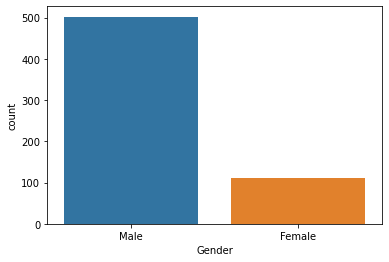

In [10]:
sns.countplot(df["Gender"])

<AxesSubplot:xlabel='Education', ylabel='count'>

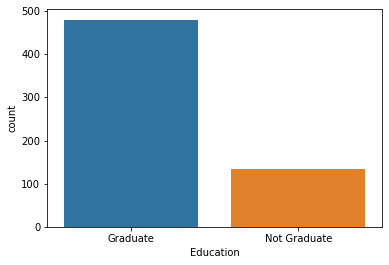

In [11]:
sns.countplot(df["Education"])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

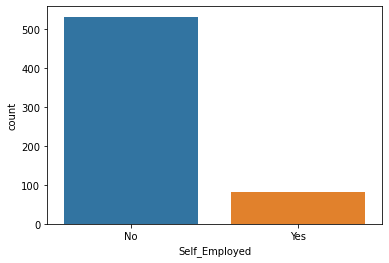

In [12]:
sns.countplot(df["Self_Employed"])

### Ploting to see if the numeric variables are normal distributed

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

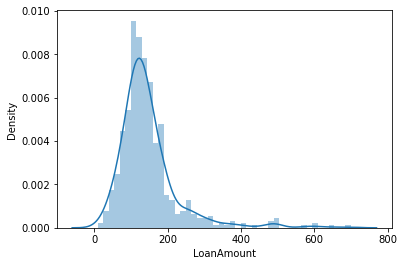

In [13]:
sns.distplot(df["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

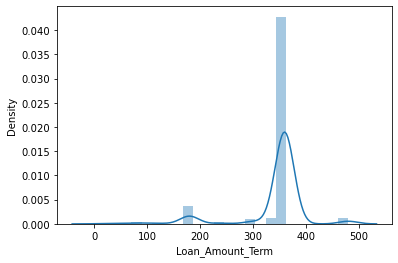

In [14]:
sns.distplot(df["Loan_Amount_Term"])

# Creating a new column

Summing the Applicant Income plus other Income that they may have

In [15]:
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

### Transforming into Log the numeric variables, this for getting a better distribution

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

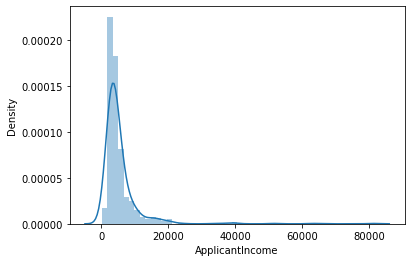

In [17]:
df["ApplicantIncome_LOG"] = np.log(df["ApplicantIncome"])
df["CoapplicantIncome_LOG"] = np.log(df["CoapplicantIncome"])
df["Loan_Amount_Term_LOG"] = np.log(df["Loan_Amount_Term"])
df["LoanAmount_LOG"] = np.log(df["LoanAmount"])
df["Total_Income_LOG"] = np.log(df["Total_Income"])

sns.distplot(df["ApplicantIncome"])

# Plotting the correlation matrix to see important information about variables

<AxesSubplot:>

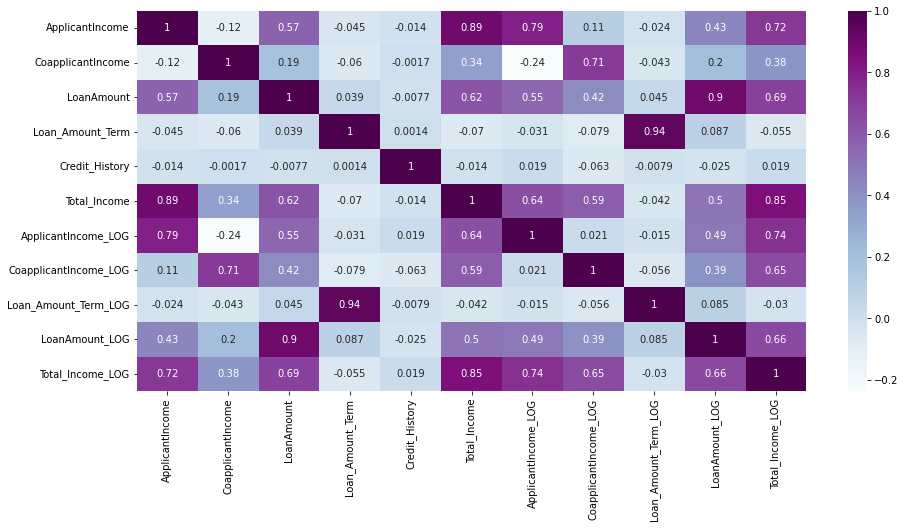

In [18]:
corr = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot = True, cmap="BuPu")

# Dropping columns because they are not important for ML models

In [19]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'ApplicantIncome_LOG', 'CoapplicantIncome_LOG',
       'Loan_Amount_Term_LOG', 'LoanAmount_LOG', 'Total_Income_LOG'],
      dtype='object')

In [20]:
cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Total_Income", "Loan_ID", "CoapplicantIncome_LOG"]
df = df.drop(columns = cols, axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_LOG,Loan_Amount_Term_LOG,LoanAmount_LOG,Total_Income_LOG
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,5.886104,4.986426,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,5.886104,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,5.886104,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,5.886104,4.787492,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,5.886104,4.948760,8.699515


# Now changing the categorial into numerical variables. This for having a better performance of our models.

In [21]:
from sklearn.preprocessing import LabelEncoder
cols = ["Gender", "Married", 'Education','Self_Employed', 'Property_Area', 'Loan_Status', "Dependents"]
le=LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
    
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_LOG,Loan_Amount_Term_LOG,LoanAmount_LOG,Total_Income_LOG
0,1,0,0,0,0,1.0,2,1,8.674026,5.886104,4.986426,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,5.886104,4.852030,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,5.886104,4.189655,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,5.886104,4.787492,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,5.886104,4.948760,8.699515


# Machine Learning

Splitting the dataset into training and testing datasets

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Loan_Status"], axis = 1)
y = df["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

Creating a function to get the accuracy and cross validation of any Machine Learning model

In [33]:
from sklearn.model_selection import cross_val_score

def model_score(model, x,y):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    model.fit(x_train,y_train)
    print("The accuracy is: ", np.round(model.score(x_test,y_test)*100))
    score = cross_val_score(model, x,y, cv = 5)
    print("Cross validation is: ", np.round(np.mean(score)*100))

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_score(model, X,y)

The accuracy is:  75.0
Cross validation is:  81.0


### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_score(model, X,y)

The accuracy is:  69.0
Cross validation is:  71.0


### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
model_score(model, X,y)

The accuracy is:  76.0
Cross validation is:  79.0


# CONCLUSIONS

We got better results with the Random Forest ML algorithm, we can predict if a customer is going to pay its loan from a 76% to 79% based on other parameters.